In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# **TEMP ALG2**

In [ ]:
import pandas as pd
 
temp_alg2 = pd.read_csv("/content/drive/MyDrive/simulaciones/csv_tfg/temp_alg2.csv")
temp_alg2 = temp_alg2.drop(['Unnamed: 0'], axis=1)
print(temp_alg2)

     id  alg  time    3    4    5    6    7    8    9  ...  79593  79594  \
0     1    2     1  937  937  937  937  937  938  936  ...    936    937   
1     1    2     2  937  938  937  937  937  938  938  ...    937    937   
2     1    2     3  938  937  937  937  937  938  937  ...    938    936   
3     1    2     4  938  937  937  937  937  937  937  ...    938    937   
4     1    2     5  938  936  938  938  938  938  936  ...    938    937   
..   ..  ...   ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
995  10    2   996  938  940  939  939  939  939  940  ...    939    939   
996  10    2   997  939  941  939  938  939  939  941  ...    940    940   
997  10    2   998  940  938  939  939  940  939  938  ...    940    939   
998  10    2   999  941  939  940  939  940  939  939  ...    939    939   
999  10    2  1000  939  939  940  939  938  940  939  ...    940    939   

     79595  79596  79597  79598  79599  79600  79601  79602  
0      936    937    937 

In [ ]:
Y = temp_alg2.iloc[:,0]
Y

0       1
1       1
2       1
3       1
4       1
       ..
995    10
996    10
997    10
998    10
999    10
Name: id, Length: 1000, dtype: int64

In [ ]:
X = temp_alg2.iloc[:, 3:]
X

,3,4,5,6,7,8,9,10,11,12,...,79593,79594,79595,79596,79597,79598,79599,79600,79601,79602
0,937,937,937,937,937,938,936,938,937,937,...,936,937,936,937,937,936,938,938,938,938
1,937,938,937,937,937,938,938,937,938,938,...,937,937,937,937,936,937,937,937,937,938
2,938,937,937,937,937,938,937,937,937,938,...,938,936,937,938,937,937,937,938,937,936
3,938,937,937,937,937,937,937,937,936,937,...,938,937,936,936,937,936,936,938,936,937
4,938,936,938,938,938,938,936,939,937,936,...,938,937,939,936,938,937,936,937,938,938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,938,940,939,939,939,939,940,940,939,940,...,939,939,939,939,939,941,939,940,940,941
996,939,941,939,938,939,939,941,939,939,940,...,940,940,940,940,939,938,938,939,940,940
997,940,938,939,939,940,939,938,939,940,940,...,940,939,940,940,939,940,940,940,940,940
998,941,939,940,939,940,939,939,939,940,939,...,939,939,940,940,939,939,940,938,940,938


### **kNN**

In [ ]:
skf = StratifiedKFold(n_splits=2)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 4)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#instantiate the model
classifier = KNeighborsClassifier(n_neighbors=4)
#fit the model using the training data
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

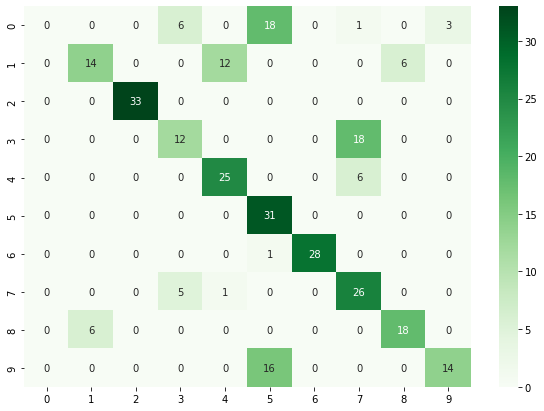

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)


df_cm = pd.DataFrame(conf_matrix, range(10), range(10))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, cmap = 'Greens', annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        28
           2       0.70      0.44      0.54        32
           3       1.00      1.00      1.00        33
           4       0.52      0.40      0.45        30
           5       0.66      0.81      0.72        31
           6       0.47      1.00      0.64        31
           7       1.00      0.97      0.98        29
           8       0.51      0.81      0.63        32
           9       0.75      0.75      0.75        24
          10       0.82      0.47      0.60        30

    accuracy                           0.67       300
   macro avg       0.64      0.66      0.63       300
weighted avg       0.65      0.67      0.64       300



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **Regresión Logística**

In [ ]:
skf = StratifiedKFold(n_splits=4)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 4)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

#define metrics
y_pred = log_regression.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


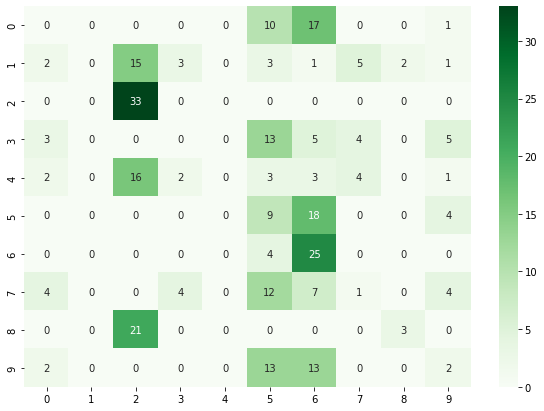

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)


df_cm = pd.DataFrame(conf_matrix, range(10), range(10))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, cmap = 'Greens', annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        28
           2       0.00      0.00      0.00        32
           3       0.39      1.00      0.56        33
           4       0.00      0.00      0.00        30
           5       0.00      0.00      0.00        31
           6       0.13      0.29      0.18        31
           7       0.28      0.86      0.42        29
           8       0.07      0.03      0.04        32
           9       0.60      0.12      0.21        24
          10       0.11      0.07      0.08        30

    accuracy                           0.24       300
   macro avg       0.16      0.24      0.15       300
weighted avg       0.15      0.24      0.15       300



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **VOLT ALG2**

In [ ]:
import pandas as pd
 
volt_alg2 = pd.read_csv("/content/drive/MyDrive/simulaciones/csv_tfg/volt_alg2.csv")
volt_alg2 = volt_alg2.drop(['Unnamed: 0'], axis=1)
print(volt_alg2)

     id  alg  time     3     4     5     6     7     8     9  ...  79593  \
0     1    2     1  1490  1490  1490  1490  1490  1490  1490  ...   1490   
1     1    2     2  1489  1489  1489  1490  1489  1490  1490  ...   1490   
2     1    2     3  1489  1490  1490  1490  1489  1490  1489  ...   1490   
3     1    2     4  1489  1491  1489  1489  1489  1489  1490  ...   1489   
4     1    2     5  1489  1490  1490  1489  1490  1490  1490  ...   1490   
..   ..  ...   ...   ...   ...   ...   ...   ...   ...   ...  ...    ...   
995  10    2   996  1503  1503  1502  1502  1503  1503  1502  ...   1503   
996  10    2   997  1503  1503  1503  1502  1503  1503  1503  ...   1502   
997  10    2   998  1503  1504  1503  1504  1503  1503  1503  ...   1503   
998  10    2   999  1503  1503  1503  1503  1503  1503  1503  ...   1502   
999  10    2  1000  1503  1502  1502  1502  1503  1503  1502  ...   1503   

     79594  79595  79596  79597  79598  79599  79600  79601  79602  
0     1489   1490 

In [ ]:
Y = volt_alg2.iloc[:,0]
Y

0       1
1       1
2       1
3       1
4       1
       ..
995    10
996    10
997    10
998    10
999    10
Name: id, Length: 1000, dtype: int64

In [ ]:
X = volt_alg2.iloc[:, 3:]
X

,3,4,5,6,7,8,9,10,11,12,...,79593,79594,79595,79596,79597,79598,79599,79600,79601,79602
0,1490,1490,1490,1490,1490,1490,1490,1489,1489,1490,...,1490,1489,1490,1491,1490,1490,1491,1490,1490,1490
1,1489,1489,1489,1490,1489,1490,1490,1490,1489,1489,...,1490,1490,1490,1490,1490,1489,1490,1489,1489,1489
2,1489,1490,1490,1490,1489,1490,1489,1490,1490,1490,...,1490,1489,1490,1490,1489,1489,1491,1490,1489,1489
3,1489,1491,1489,1489,1489,1489,1490,1489,1489,1490,...,1489,1490,1490,1490,1489,1489,1489,1490,1489,1489
4,1489,1490,1490,1489,1490,1490,1490,1489,1489,1490,...,1490,1490,1490,1489,1489,1489,1490,1489,1490,1490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1503,1503,1502,1502,1503,1503,1502,1503,1503,1503,...,1503,1502,1503,1504,1503,1503,1504,1503,1503,1503
996,1503,1503,1503,1502,1503,1503,1503,1503,1503,1503,...,1502,1503,1504,1503,1503,1503,1503,1502,1503,1503
997,1503,1504,1503,1504,1503,1503,1503,1503,1503,1503,...,1503,1502,1502,1502,1503,1503,1503,1503,1503,1503
998,1503,1503,1503,1503,1503,1503,1503,1503,1502,1503,...,1502,1504,1503,1502,1503,1503,1504,1502,1503,1503


### **kNN**

In [ ]:
skf = StratifiedKFold(n_splits=2)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 4)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#instantiate the model
classifier = KNeighborsClassifier(n_neighbors=4)
#fit the model using the training data
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

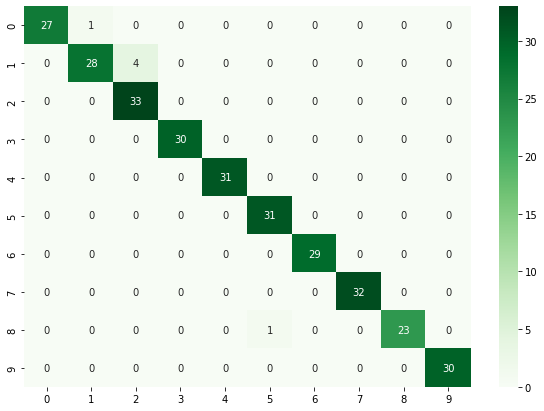

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)


df_cm = pd.DataFrame(conf_matrix, range(10), range(10))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, cmap = 'Greens', annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.96      0.98        28
           2       0.97      0.88      0.92        32
           3       0.89      1.00      0.94        33
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        31
           6       0.97      1.00      0.98        31
           7       1.00      1.00      1.00        29
           8       1.00      1.00      1.00        32
           9       1.00      0.96      0.98        24
          10       1.00      1.00      1.00        30

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



### **Regresión Logística**

In [ ]:
skf = StratifiedKFold(n_splits=4)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 4)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

#define metrics
y_pred = log_regression.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


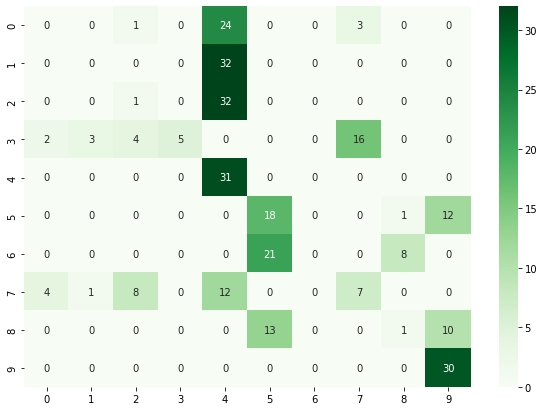

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)


df_cm = pd.DataFrame(conf_matrix, range(10), range(10))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, cmap = 'Greens', annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        28
           2       0.00      0.00      0.00        32
           3       0.07      0.03      0.04        33
           4       1.00      0.17      0.29        30
           5       0.24      1.00      0.38        31
           6       0.35      0.58      0.43        31
           7       0.00      0.00      0.00        29
           8       0.27      0.22      0.24        32
           9       0.10      0.04      0.06        24
          10       0.58      1.00      0.73        30

    accuracy                           0.31       300
   macro avg       0.26      0.30      0.22       300
weighted avg       0.26      0.31      0.22       300



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **ALGORITMO 2**

In [ ]:
import pandas as pd

temp_alg2 = pd.read_csv("/content/drive/MyDrive/simulaciones/csv_tfg/temp_alg2.csv")
temp_alg2 = temp_alg2.drop(['Unnamed: 0'], axis=1)
print(temp_alg2)

volt_alg2 = pd.read_csv("/content/drive/MyDrive/simulaciones/csv_tfg/volt_alg2.csv")
volt_alg2 = volt_alg2.drop(['Unnamed: 0', 'id', 'alg'], axis=1)
print(volt_alg2)

     id  alg  time    3    4    5    6    7    8    9  ...  79593  79594  \
0     1    2     1  937  937  937  937  937  938  936  ...    936    937   
1     1    2     2  937  938  937  937  937  938  938  ...    937    937   
2     1    2     3  938  937  937  937  937  938  937  ...    938    936   
3     1    2     4  938  937  937  937  937  937  937  ...    938    937   
4     1    2     5  938  936  938  938  938  938  936  ...    938    937   
..   ..  ...   ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
995  10    2   996  938  940  939  939  939  939  940  ...    939    939   
996  10    2   997  939  941  939  938  939  939  941  ...    940    940   
997  10    2   998  940  938  939  939  940  939  938  ...    940    939   
998  10    2   999  941  939  940  939  940  939  939  ...    939    939   
999  10    2  1000  939  939  940  939  938  940  939  ...    940    939   

     79595  79596  79597  79598  79599  79600  79601  79602  
0      936    937    937 

In [ ]:
alg2 = pd.merge(temp_alg2, volt_alg2, on='time', suffixes=('_1', '_2'))
alg2

,id,alg,time,3_1,4_1,5_1,6_1,7_1,8_1,9_1,...,79593_2,79594_2,79595_2,79596_2,79597_2,79598_2,79599_2,79600_2,79601_2,79602_2
0,1,2,1,937,937,937,937,937,938,936,...,1490,1489,1490,1491,1490,1490,1491,1490,1490,1490
1,1,2,2,937,938,937,937,937,938,938,...,1490,1490,1490,1490,1490,1489,1490,1489,1489,1489
2,1,2,3,938,937,937,937,937,938,937,...,1490,1489,1490,1490,1489,1489,1491,1490,1489,1489
3,1,2,4,938,937,937,937,937,937,937,...,1489,1490,1490,1490,1489,1489,1489,1490,1489,1489
4,1,2,5,938,936,938,938,938,938,936,...,1490,1490,1490,1489,1489,1489,1490,1489,1490,1490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10,2,996,938,940,939,939,939,939,940,...,1503,1502,1503,1504,1503,1503,1504,1503,1503,1503
996,10,2,997,939,941,939,938,939,939,941,...,1502,1503,1504,1503,1503,1503,1503,1502,1503,1503
997,10,2,998,940,938,939,939,940,939,938,...,1503,1502,1502,1502,1503,1503,1503,1503,1503,1503
998,10,2,999,941,939,940,939,940,939,939,...,1502,1504,1503,1502,1503,1503,1504,1502,1503,1503


In [ ]:
Y = alg2.iloc[:,0]
Y

0       1
1       1
2       1
3       1
4       1
       ..
995    10
996    10
997    10
998    10
999    10
Name: id, Length: 1000, dtype: int64

In [ ]:
X = alg2.iloc[:, 3:]
X

,3_1,4_1,5_1,6_1,7_1,8_1,9_1,10_1,11_1,12_1,...,79593_2,79594_2,79595_2,79596_2,79597_2,79598_2,79599_2,79600_2,79601_2,79602_2
0,937,937,937,937,937,938,936,938,937,937,...,1490,1489,1490,1491,1490,1490,1491,1490,1490,1490
1,937,938,937,937,937,938,938,937,938,938,...,1490,1490,1490,1490,1490,1489,1490,1489,1489,1489
2,938,937,937,937,937,938,937,937,937,938,...,1490,1489,1490,1490,1489,1489,1491,1490,1489,1489
3,938,937,937,937,937,937,937,937,936,937,...,1489,1490,1490,1490,1489,1489,1489,1490,1489,1489
4,938,936,938,938,938,938,936,939,937,936,...,1490,1490,1490,1489,1489,1489,1490,1489,1490,1490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,938,940,939,939,939,939,940,940,939,940,...,1503,1502,1503,1504,1503,1503,1504,1503,1503,1503
996,939,941,939,938,939,939,941,939,939,940,...,1502,1503,1504,1503,1503,1503,1503,1502,1503,1503
997,940,938,939,939,940,939,938,939,940,940,...,1503,1502,1502,1502,1503,1503,1503,1503,1503,1503
998,941,939,940,939,940,939,939,939,940,939,...,1502,1504,1503,1502,1503,1503,1504,1502,1503,1503


### **kNN**

In [ ]:
skf = StratifiedKFold(n_splits=2)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 4)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#instantiate the model
classifier = KNeighborsClassifier(n_neighbors=4)
#fit the model using the training data
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

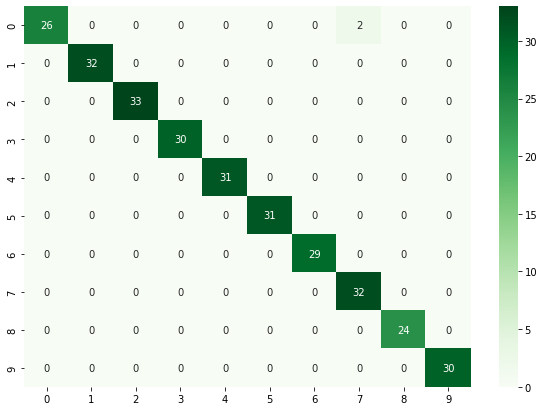

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)


df_cm = pd.DataFrame(conf_matrix, range(10), range(10))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, cmap = 'Greens', annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.93      0.96        28
           2       1.00      1.00      1.00        32
           3       1.00      1.00      1.00        33
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        31
           6       1.00      1.00      1.00        31
           7       1.00      1.00      1.00        29
           8       0.94      1.00      0.97        32
           9       1.00      1.00      1.00        24
          10       1.00      1.00      1.00        30

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



### **Regresión Logística**

In [ ]:
skf = StratifiedKFold(n_splits=4)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 4)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

#define metrics
y_pred = log_regression.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


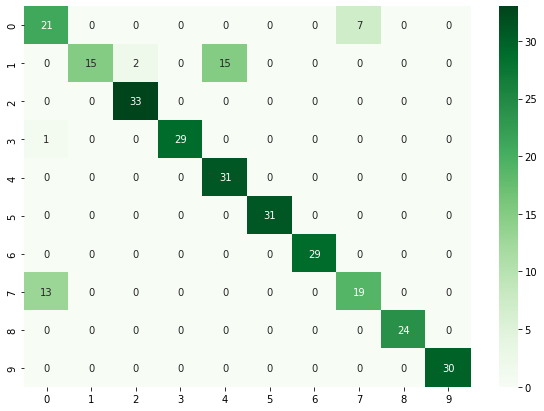

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)


df_cm = pd.DataFrame(conf_matrix, range(10), range(10))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, cmap = 'Greens', annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.60      0.75      0.67        28
           2       1.00      0.47      0.64        32
           3       0.94      1.00      0.97        33
           4       1.00      0.97      0.98        30
           5       0.67      1.00      0.81        31
           6       1.00      1.00      1.00        31
           7       1.00      1.00      1.00        29
           8       0.73      0.59      0.66        32
           9       1.00      1.00      1.00        24
          10       1.00      1.00      1.00        30

    accuracy                           0.87       300
   macro avg       0.89      0.88      0.87       300
weighted avg       0.89      0.87      0.87       300

